In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('datasets/cars_data.csv')
df.price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [106]:
df = df.replace('?', np.nan)
df.info()
df.price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

# Cleaning the data!

## Cleaning the numeric data!

In [107]:
df = df.replace('?', np.nan)
# df.head(50)
df.price

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [108]:
df['price'] = pd.to_numeric(df['price'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['wheel-base'] = pd.to_numeric(df['wheel-base'])
df['num-of-cylinders'] = df['num-of-cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})


In [109]:
temp = df.select_dtypes(include=[np.number])
len(temp.columns)
print(temp.columns)
print(len(temp.columns))
print(len(temp.index))


Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
17
205


In [110]:
from sklearn.impute import SimpleImputer
# making the imputer and telling it to replace missing values with the median
imputer = SimpleImputer( strategy='median') # missing_values = np.nan,
# selecting the numeric columns so we don't break the imputer
df_num = df.select_dtypes(include=[np.number])
# print(df_num.shape)
print(len(df_num.columns))
print(df_num.columns)
# median is in statistics_ variable
imputer.fit(df_num)
x = imputer.transform(df_num)
len(x[0])
# creating a dataframe without any missing numeric types
df_num = pd.DataFrame(x, columns = df_num.columns, index=df_num.index)


17
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [112]:

# price highway-mpg city-mpg horsepower
# price 5118 to 45400
# hwmpg 16 to 54
# citympg 13 to 49
# hp 48 to 288
print(df_num['price'].describe())
# print(df_num['highway-mpg'].describe())
# print(df_num['city-mpg'].describe())
print(df_num['horsepower'].describe())

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64
count    205.000000
mean     104.165854
std       39.529733
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num[['horsepower','price','highway-mpg','city-mpg']] = scaler.fit_transform(df_num[['horsepower','price','highway-mpg','city-mpg']])

## Cleaning categorical data!

In [114]:
df_cat = df.select_dtypes(exclude=[np.number])

In [115]:
# WAS USING THIS TO REPLACE MISSING VALUES WITH SOMETHING USEFUL BUT I'M SHORT ON TIME
# temp = df_cat[(df_cat["num-of-doors"] != "two") & (df_cat["num-of-doors"] != "four") ]
# for i in range( len(temp["num-of-doors"]) ):
#     temp.iloc[i]["num-of-doors"] = "four"

In [116]:
df_cat = df_cat.fillna("other")

In [117]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoder = ordinal_encoder.fit_transform(df_cat)
# ordinal_encoder.categories_
# df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Combining the cleaned num and cat dataframes

In [118]:
# df = df_num.append(df_cat, ignore_index = False, sort=True) THIS CRAP DOESN'T WORK AT ALL (it adds more rows not columns)
for col in df_num:
    df[col] = df_num[col]
for col in df_cat:
    df[col] = df_cat[col]



# Exploring the data!

AttributeError: 'DataFrame' object has no attribute 'show'

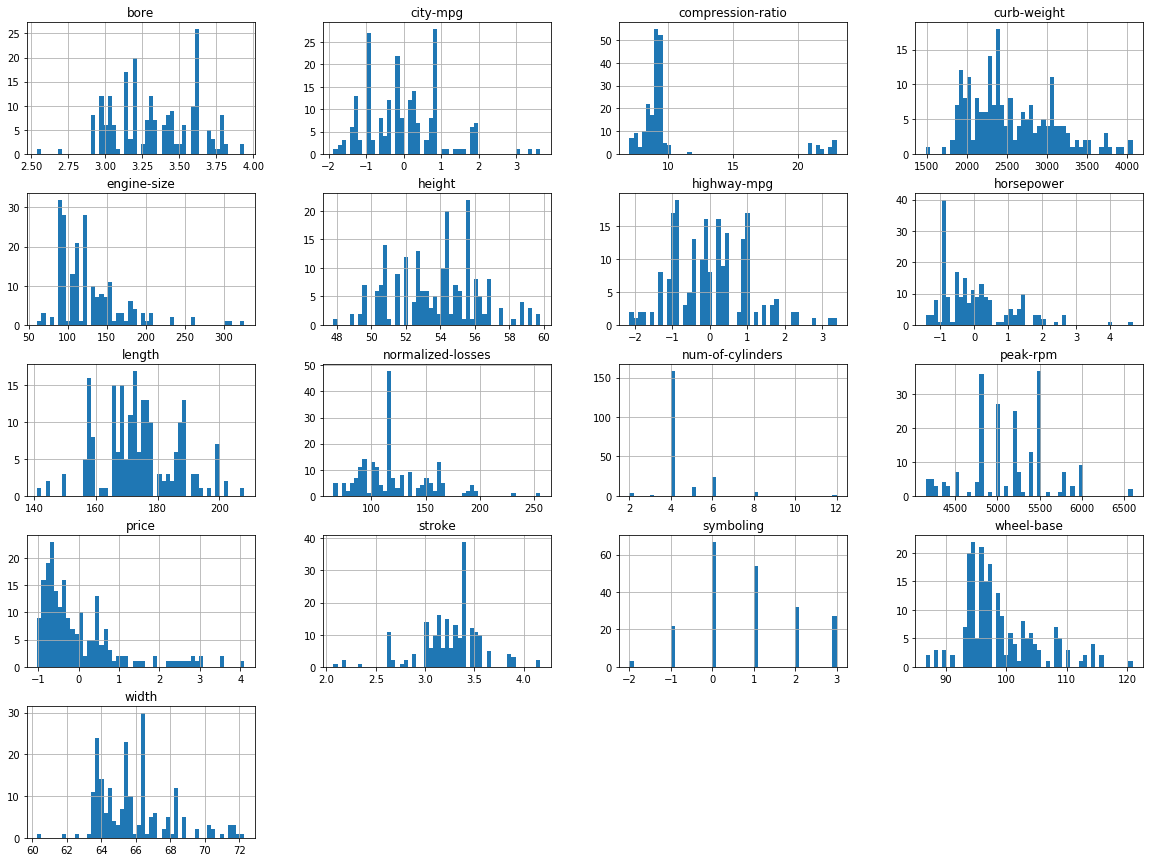

In [119]:
df.hist(bins=50, figsize=(20,15))
# bins are the number of bars you will use to show the data
# figsize defines how big each box will be for graph
# save_fig("attribute_history_gram") this is used in the source code but not mine
df.show()


In [120]:
corr_matrix = df.corr() 
corr_matrix
# looking at how the other numberic features relate to median_house_value
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.860343
curb-weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
num-of-cylinders     0.681036
wheel-base           0.584847
bore                 0.532861
height               0.140439
normalized-losses    0.095489
stroke               0.083627
compression-ratio    0.072890
symboling           -0.080149
peak-rpm            -0.107283
city-mpg            -0.668822
highway-mpg         -0.693037
Name: price, dtype: float64

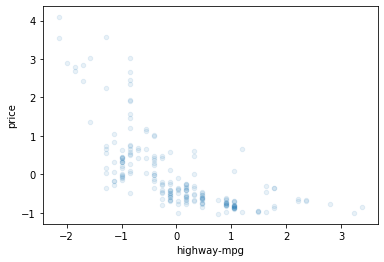

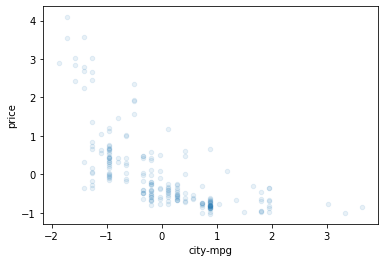

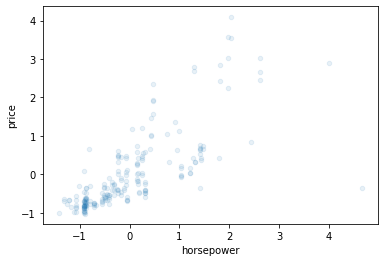

In [124]:
# df.plot(kind="scatter", x='engine-size', y='price', alpha=0.1) I'm letting this go because getting engine-size seems impossible in production
df.plot(kind="scatter", x='highway-mpg', y='price', alpha=0.1)
df.plot(kind="scatter", x='city-mpg', y='price', alpha=0.1)
df.plot(kind="scatter", x='horsepower', y='price', alpha=0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24f7c190>,
      dtype=object)

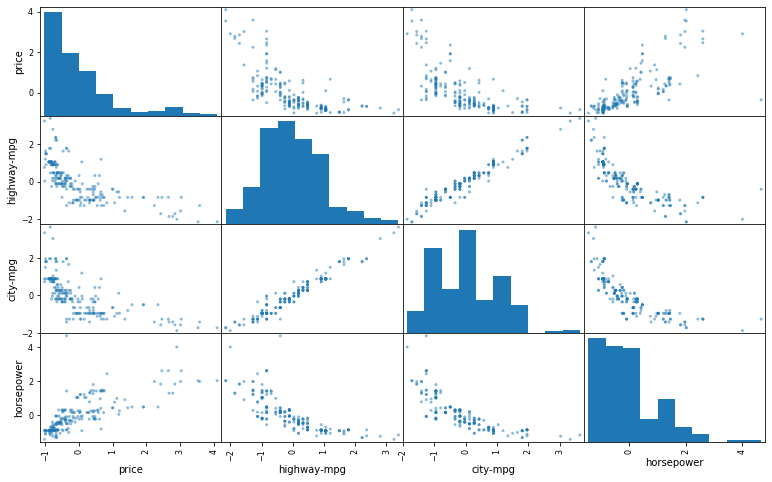

In [123]:
from pandas.plotting import scatter_matrix
attr = ['price','highway-mpg','city-mpg','horsepower']
scatter_matrix(df[attr], figsize=(13,8))


In [125]:
# model_data = df[['price','highway-mpg','city-mpg']]
# model_data


# Split data into training and test data

In [126]:
from sklearn.model_selection import train_test_split # price highway-mpg city-mpg horsepower

train_set, test_set = train_test_split(df[['highway-mpg','city-mpg','horsepower','price']], test_size=0.2, random_state=42)

In [129]:
# train_set.describe()

In [130]:
# test_set.describe()

# Build pipeline

# Select a model

## Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = train_set[['highway-mpg','city-mpg','horsepower']]
y = train_set['price']
lin_reg.fit(x,y) # price highway-mpg city-mpg horsepower
print( lin_reg.score(x,y) )
print( lin_reg.coef_ )

0.6238228099797856
[-0.76603623  0.46811383  0.52398427]


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Lables:',list(some_labels))


## Decision Tree Regressor

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# testing it out
tree_rmse = rmse(tree_reg, housing_prepared, housing_labels)
print('Decision Tree Regression RMSE:', tree_rms)

## Random Forest Regression

In [142]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

/Users/sheldonmaygunlogson/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_rmse = rmse(forest_reg, housing_prepared, housing_labels)
print('Random Forest Regression RMSE:', forest_rmse)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
# scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)
display_scores(scores)

# Testing the models

## RMSE

In [143]:
# rmse
from sklearn.metrics import mean_squared_error

def rmse(model, data_prepared, labels):
    predictions = model.predict(data_prepared)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return rmse

lin_rmse = rmse(lin_reg, x, y) 
print('Linear Regression RMSE:', lin_rmse)
# print( df['price'].describe() ) 
tree_rmse = rmse(tree_reg, x, y)
print('Decision Tree Regression RMSE:', tree_rmse)
forest_rmse = rmse(forest_reg, x, y)
print('Random Forest Regression RMSE:', forest_rmse)

Linear Regression RMSE: 0.5922324047455587
Decision Tree Regression RMSE: 0.13066787400963537
Random Forest Regression RMSE: 0.19663521174632823


In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(model, data_prepared, labels):
    predictions = model.predict(data_prepared)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return rmse

# housing_predictions = lin_reg.predict(housing_prepared)
# lin_mse = mean_squared_error(housing_labels, housing_predictions)
# lin_rmse = np.sqrt(lin_mse)
lin_rmse = rmse(lin_reg, housing_prepared, housing_labels)
print('Linear Regression RMSE:', lin_rmse)

## Cross Validation

In [133]:
# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores, 'Score len:', len(scores))
    print('Mean:', scores.mean()) 
    print('Standard Deviation:', scores.std())

display_scores(tree_rmse_scores)

In [134]:
# more testing

In [ ]:
# lin_reg
# tree_reg
# forest_reg

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

lin_reg_rmse = rmse(lin_reg, X_test_prepared, y_test)
tree_reg_rmse = rmse(tree_reg, X_test_prepared, y_test)
forest_reg_rmse = rmse(forest_reg, X_test_prepared, y_test)

print("lin rmse:", lin_reg_rmse)
print("tree rmse:", tree_reg_rmse)
print("forest rmse:", forest_reg_rmse)
# def rmse(model, data_prepared, labels):

# Saving Models in Pickles!

In [147]:
import joblib # lin_reg tree_reg forest_reg
joblib.dump(lin_reg, 'models/lin_reg.pkl')
joblib.dump(tree_reg, 'models/tree_reg.pkl')
joblib.dump(forest_reg, 'models/forest_reg.pkl')

['models/forest_reg.pkl']

In [146]:
lr = joblib.load('models/lin_reg.pkl')
tr = joblib.load('models/tree_reg.pkl')
fr = joblib.load('models/forest_reg.pkl')

x_test = test_set[['highway-mpg','city-mpg','horsepower']]
y_test = test_set['price']

lr_rmse = rmse(lr, x_test, y_test) 
print('Linear Regression RMSE:', lr_rmse)
# print( df['price'].describe() ) 
# tree_rmse = rmse(tree_reg, x, y)
# print('Decision Tree Regression RMSE:', tree_rmse)
# forest_rmse = rmse(forest_reg, x, y)
# print('Random Forest Regression RMSE:', forest_rmse)

Linear Regression RMSE: 0.7333766865901302


In [ ]:
import joblib
# to save
joblib.dump(my_model, 'my_model.pkl')
# to read from pickel ( .pkl ) file
my_model_loaded = joblib.load('my_model.pkl')